KoNLPy 설치 참조 문서  
http://konlpy.org/ko/latest/install/

In [ ]:
!pip install datasets
!pip install transformers
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1
!pip3 install konlpy
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip3 install /tmp/mecab-python-0.996
!pip install plotly
!unzip /content/drive/MyDrive/ColabNotebooks/sp_tokenizer.zip
!pip install -U kaleido
from google.colab import drive
drive.mount('/content/drive')
!pip install sentencepiece

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 72.0 MB/s 
     |████████████████████████████████| 596 kB 79.2 MB/s 
     |████████████████████████████████| 6.5 MB 72.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import plotly.express as px
import datasets
import pandas as pd
import tqdm
from IPython.display import Image
tqdm.tqdm.pandas()
%matplotlib inline
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.111.165.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.111.165.2:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
path_to_file = '/content/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

In [ ]:
with open(path_to_file, "r") as f:
    text = f.read().splitlines()

print(len(text))

print("example:")
for tex in text[0:100][::20]: print(">>", tex)

94123
example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


추가 데이터에 대한 참조링크  
https://github.com/jungyeul/korean-parallel-corpora

긴 데이터와 짧은 데이터에 대해 어느정도 사용할지 정립

In [ ]:
text[:100][::20]

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.',
 '"경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."',
 '수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.',
 '또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.']

In [ ]:
data_dict = {"text":text}

In [ ]:
ds = datasets.Dataset.from_dict(data_dict)

In [ ]:
df = pd.DataFrame(data_dict)

In [ ]:
df['len'] = df.text.progress_apply(len)

100%|██████████| 94123/94123 [00:00<00:00, 726189.31it/s]


In [ ]:
fig = px.histogram(df, x=df.index, y=df.len, labels={"index":"Sentences","len":"length"},nbins=df.shape[0])


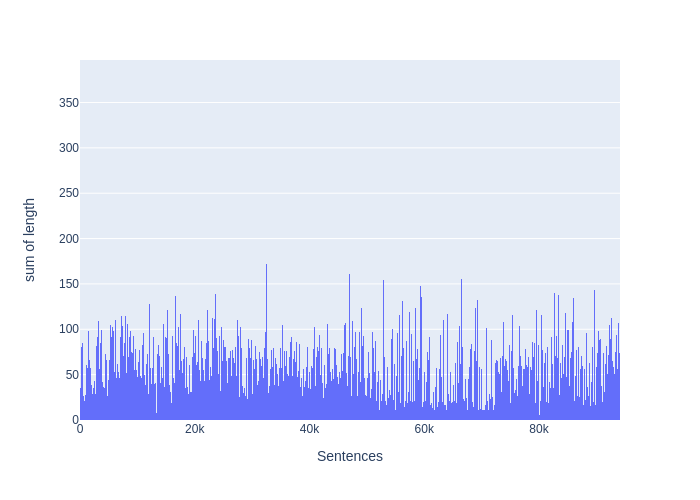

In [ ]:
Image(fig.to_image())

In [ ]:
df.len.describe()

count    94123.000000
mean        60.780489
std         29.748743
min          1.000000
25%         40.000000
50%         59.000000
75%         79.000000
max        377.000000
Name: len, dtype: float64

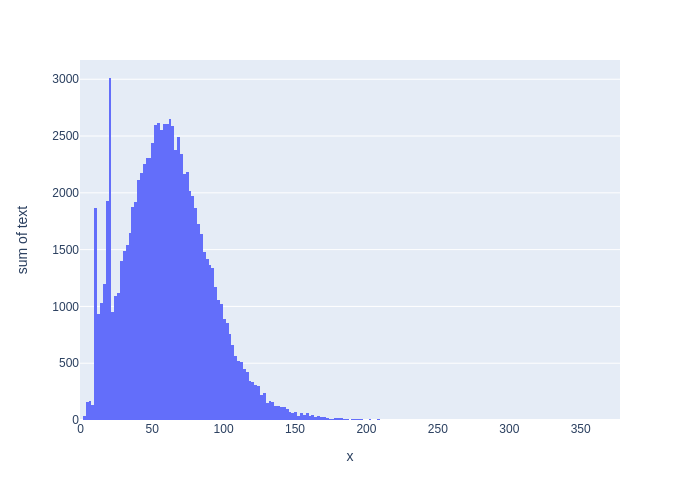

In [ ]:
fig = px.histogram(df.groupby('len').count(), x=df.groupby('len').count().index,y="text",nbins=len(df.groupby('len').count().index))
Image(fig.to_image())

In [ ]:
df[df.len==1]

,text,len
11724,’,1


In [ ]:
df.drop(axis=0,index=11724,inplace=True)

In [ ]:
count_df = df.groupby("len").count()

In [ ]:
count_df[count_df.text > 1500 ]

,text
len,
11,1761
19,1611
21,2113


In [ ]:
for i in df[df.len == 11].itertuples():
    print(i.text)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [ ]:
new_df = pd.DataFrame({"text":list(set(text))})

In [ ]:
new_df["len"] = new_df.text.progress_apply(len)

100%|██████████| 77591/77591 [00:00<00:00, 616287.06it/s]


In [ ]:
new_df[new_df.len == 1]

,text,len
32784,’,1


In [ ]:
new_df.drop(index=65644,inplace=True)

In [ ]:
new_count_df = new_df.groupby("len").count()

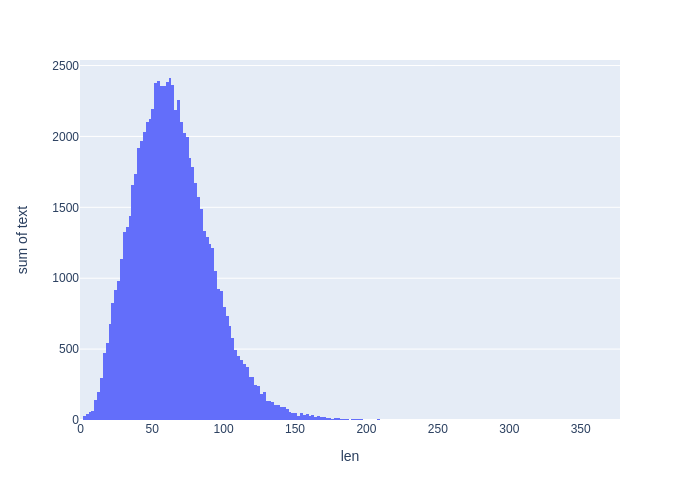

In [ ]:
fig = px.histogram(new_count_df, x=new_count_df.index,y="text",nbins=len(new_count_df))
Image(fig.to_image())

In [ ]:
new_count_df.describe()

,text
count,219.000000
mean,354.292237
std,416.061047
min,1.000000
25%,12.000000
50%,134.000000
75%,667.000000
max,1233.000000


In [ ]:
new_df.describe()

,len
count,77590.000000
mean,64.538523
std,27.183396
min,1.000000
25%,45.000000
50%,62.000000
75%,81.000000
max,377.000000


In [ ]:
condition_df = new_df[(new_df.len < 150) & (new_df.len > 10) ]

In [ ]:
condition_df.describe()

,len
count,76835.000000
mean,64.080640
std,25.748041
min,11.000000
25%,45.000000
50%,62.000000
75%,80.000000
max,149.000000


In [ ]:
con_count_df = condition_df.groupby("len").count()

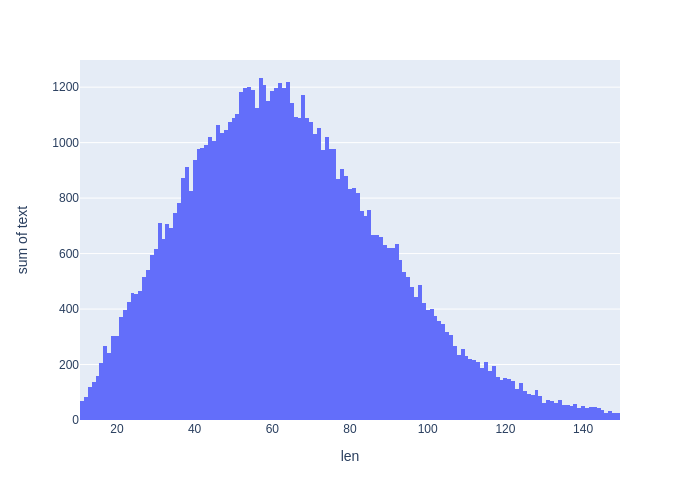

In [ ]:
fig = px.histogram(con_count_df, x=con_count_df.index, y="text",nbins=con_count_df.shape[0])
Image(fig.to_image())

In [ ]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters="")
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,padding="pre",maxlen=50)
    
    return tensor, tokenizer

In [ ]:
corpus = condition_df.text.to_list()

In [ ]:
split_corpus = []
for sentence in corpus:
    split_corpus.append(sentence.split())

In [ ]:
len(split_corpus)

76835

In [ ]:
split_tensor, split_tokenizer = tokenize(split_corpus)

In [ ]:
len(split_tokenizer.index_word)

237373

In [ ]:
split_tokenizer.word_index

{'이': 1,
 '밝혔다.': 2,
 '있다.': 3,
 '말했다.': 4,
 '수': 5,
 '있는': 6,
 '그는': 7,
 '대한': 8,
 '위해': 9,
 '전했다.': 10,
 '지난': 11,
 '이번': 12,
 '한': 13,
 '대해': 14,
 '것으로': 15,
 '전': 16,
 '것이라고': 17,
 '미국': 18,
 '있다고': 19,
 '것을': 20,
 '중': 21,
 '미': 22,
 '그러나': 23,
 '다른': 24,
 '더': 25,
 '이라크': 26,
 '한편': 27,
 '많은': 28,
 '통해': 29,
 '위한': 30,
 '대통령은': 31,
 '가장': 32,
 '같은': 33,
 '그의': 34,
 '이후': 35,
 '그': 36,
 '또': 37,
 '대변인은': 38,
 '후': 39,
 '동안': 40,
 '주장했다.': 41,
 '것은': 42,
 '될': 43,
 '할': 44,
 '부시': 45,
 '또한': 46,
 '것이다.': 47,
 '보도했다.': 48,
 '덧붙였다.': 49,
 '및': 50,
 '영국': 51,
 '중국': 52,
 '두': 53,
 '자신의': 54,
 '약': 55,
 '현재': 56,
 '등': 57,
 '함께': 58,
 '모든': 59,
 '것이': 60,
 '최근': 61,
 '그리고': 62,
 '했다.': 63,
 '당시': 64,
 '경우': 65,
 '예정이다.': 66,
 '설명했다.': 67,
 '새로운': 68,
 '때문에': 69,
 '경찰은': 70,
 '있다”고': 71,
 'the': 72,
 '세계': 73,
 '정부는': 74,
 '하는': 75,
 '않았다.': 76,
 '몇': 77,
 '오바마': 78,
 '큰': 79,
 '것”이라고': 80,
 '때': 81,
 '수도': 82,
 '대통령이': 83,
 '대통령': 84,
 '않을': 85,
 '열린': 86,
 '있습니다.': 87,
 '하고': 88,
 '지난

In [ ]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus=[]

for sentence in corpus:
    mecab_corpus.append(mecab_split(sentence))

In [ ]:
len(mecab_corpus)

76835

In [ ]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52268


공공 인공지능 오픈 API, DATA 서비스 포털  
http://aiopen.etri.re.kr/service_dataset.php

구글과 엑소브레인을 비교 했을 때 엑소브레인의 Wordpiece 기반 한국어 언어 모델이 성능이 좋은데  
이는 구글에 비해 엑소브레인이 한국어에 특화하여 학습했기 때문  
엑소브레인의 BERT에는 형태소 분석기 토크나이저를 사용한 것이 더 성능이 좋은데, 이는 WordPiece 모델은
순수 통계적 빈도 기반으로 자주 사용되는 패턴을 사전에 등재한 것이지만 형태소 분석기는  
한국어 문법과 의미정보를 바탕으로 개발하여 현재 성능이 좋다고 알려진 Subword 기반 토크나이저보다 성능이 좋음  
그러나 사용은 SentencePiece와 같은 Subword 토크나이저가 더 많이 사용되는데, 이유는 데이터 관리와 유지보수 때문임, subword 기반으로 작동하면 OOV에 robust하게 대처가 가능하고 언어에 중립적이며 엔지니어가 작업하기 손쉬움

In [ ]:
mecab_tensor[100]

array([ 3175,    25,  1423,     7,  2922,    10,     4,   911,   149,
          51,  1185,    32,     6, 10740,  5348,     4,    30,  1407,
          15,  1898,   241,    48,   107,  1588,  1117,   107,    20,
        4389,     5,  4225,    62,     2,     1,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)

In [ ]:
mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])

["농업 과 관광 에 의존 하 는 인구 7 만 1000 명 의 빈국 도미니카 는 그 자체 가 상품 화 된 ' 자연 섬 ' 으로 명성 을 인정받 았 다 ."]

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

google/sentencepiece  
https://github.com/google/sentencepiece

In [ ]:
import sentencepiece as spm
temp_file = '/content/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

In [ ]:
filtered_corpus = condition_df.text.to_list()

In [ ]:
vocab_size = 8000
with open(temp_file, 'w') as f:
    for row in filtered_corpus:
        f.write(str(row)+'\n')

In [ ]:
spm.SentencePieceTrainer.Train(f'--input={temp_file} --model_prefix=korean_spm --vocab_size={vocab_size}')
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

In [ ]:
!ls -l korean_spm*

-rw-r--r-- 1 root root 376818 Mar 16 08:57 korean_spm.model
-rw-r--r-- 1 root root 146214 Mar 16 08:57 korean_spm.vocab


In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')
# SentencePiece 활용 encoding
tokensIDs = s.EncodeAsIds("아버지가방에들어가신다.")
print(tokensIDs)

[1242, 11, 302, 7, 3608, 11, 287, 38, 3]


In [ ]:
# encoded piece
print(s.SampleEncodeAsPieces("아버지가방에들어가신다.",1,0.0))

['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']


In [ ]:
# decode
print(s.DecodeIds(tokensIDs))

아버지가방에들어가신다.


In [ ]:
def sp_tokenize(s, corpus):
    tensor=[]
    
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
    
    with open("./korean_spm.vocab",'r') as f:
        vocab = f.readlines()
    
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]
        
        word_index.update({idx:word})
        index_word.update({word:idx})
    
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,padding='post')
    return tensor, word_index, index_word

In [ ]:
my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1954 5664    5    4 7975 1989    3    0    0    0    0    0    0    0]
 [ 107 1642  101    4    0  417   11    4   14    0 1974    3    3    3]]


In [ ]:
sentiment_path = '/content/aiffel/aiffel/sp_tokenizer/nsmc/'

In [ ]:
senti_df = pd.read_table(sentiment_path+"ratings.txt")

In [ ]:
senti_df

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [ ]:
senti_df.isna().sum()

id          0
document    8
label       0
dtype: int64

In [ ]:
senti_df.dropna(inplace=True)

In [ ]:
senti_df.shape

(199992, 3)

In [ ]:
senti_df["len"] =  senti_df.document.progress_apply(len)

100%|██████████| 199992/199992 [00:00<00:00, 778928.43it/s]


In [ ]:
senti_df.len.describe()

count    199992.000000
mean         35.215844
std          29.539722
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         142.000000
Name: len, dtype: float64

In [ ]:
senti_count_df =  senti_df.groupby("len").count()

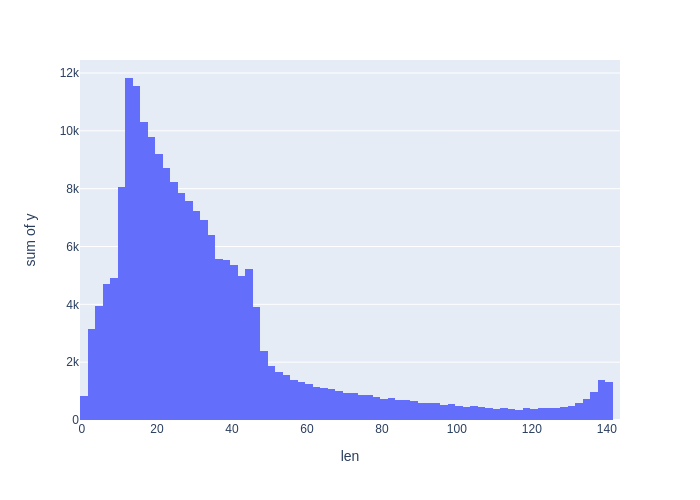

In [ ]:
fig = px.histogram(senti_count_df['document'],x=senti_count_df.index, y=senti_count_df.document, nbins=senti_count_df.shape[0])
Image(fig.to_image())

In [ ]:
senti_count_df["document"].describe()

count     141.000000
mean     1418.382979
std      1621.347507
min         1.000000
25%       261.000000
50%       528.000000
75%      2490.000000
max      6032.000000
Name: document, dtype: float64

In [ ]:
senti_count_df.document.quantile(0.005)

124.20000000000002

In [ ]:
senti_count_df.document.quantile(0.995)

5981.6

In [ ]:
filtered_df = senti_df[(senti_df.len > 1) & (senti_df.len < 50)]

In [ ]:
f_count_df = filtered_df.groupby("len").count()

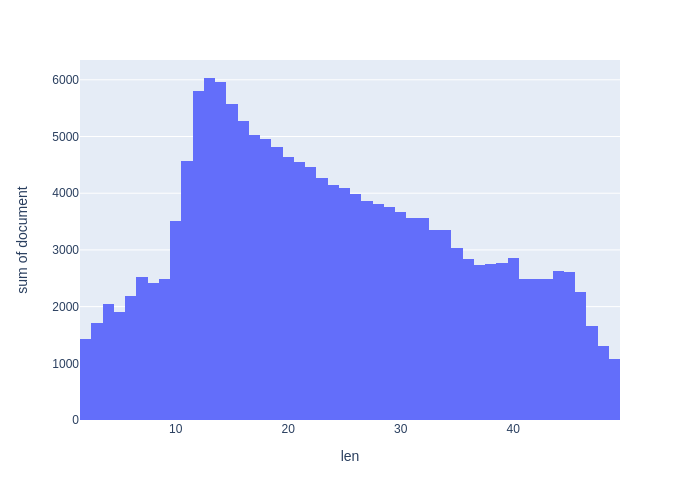

In [ ]:
fig = px.histogram(f_count_df,x=f_count_df.index,y=f_count_df.document,nbins=f_count_df.shape[0])
Image(fig.to_image())

In [ ]:
filtered_df[filtered_df.len == 11].sample(10)

,id,document,label,len
157339,8610250,이게영환가?쓰레긴가?,0,11
161894,8168723,".,.,.,.,.,.",0,11
62518,6601687,재밌어 짱짱!@^^@,1,11
6753,7242416,천조국에 흔한 중2병,1,11
181615,9090821,원작을 파.괴.한.다,0,11
169084,4295299,이건 또 뭔가요;;;,0,11
129460,3477994,아악!! 내 눈!!!,0,11
37504,304650,은근히 진솔한 드라마,1,11
26066,7310847,니콜 키드먼 리즈시절,1,11
32374,9642258,태평군 힘내시길~!!,1,11


In [ ]:
filtered_df.label.sum()

81920

In [ ]:
filtered_df

,id,document,label,len
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,19
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,36
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,27
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1,29
6,9279041,완전 감동입니다 다시봐도 감동,1,16
...,...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0,14
199996,3302770,쓰.레.기,0,5
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0,33
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0,35


In [ ]:
senti_corpus = filtered_df.document.to_list()

In [ ]:
senti_corpus

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음',
 '바보가 아니라 병 쉰 인듯',
 '재밌다',
 '고질라니무 귀엽다능ㅋㅋ',
 '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.',
 '3도 반전 좋았제 ^^',
 '네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..',
 '단연 최고',
 '가면 갈수록 더욱 빠져드네요 밀회 화이팅!!',
 '오랜만에 본 제대로 된 범죄스릴러~',
 '마지막씬을 잊을수가 없다',
 '강압적용서,세뇌적용서에 대한 비판',
 '중세시대명작. 굿 평점이왜이래',
 '사람이 어떻게 저런짓을 할 수가 있는지ㅡㅡ 보는 내가 다 화나더라',
 '최고다. 삼일동안 쉬는틈틈이 잠도 줄여가면서 봤다..여운이 남는다.',
 '실화여서 더욱 충격, 다시는 어디에서도 일어나서는 안될 경각심을 일깨워주는 영화',
 '존 그라샴 작품이라면 한번쯤은 볼가치가 있지',
 '농아인문화에 대한 알아야 합니다.',
 '이거어렸을때되게재밌게봄ㅋㅋ이정재 이범수ㅋㅋㅋㅋ연기쩜',
 '친구의 우정이 매우 감동적이었다',
 '굿굿굿 또해라또해라 제발 ㅠㅠ',
 '아 재미있다. 이 말이 너무 어울린다.',
 '제이크 질렌할..넌 대체 못하는 연기가 뭐냐.',
 '보는내내 입가에 미소가 샤방샤방했던 영화.',
 '원표가 왜 조연이양... 젤 많이 나오는구만...ㅋㅋ 재미있음...',
 '마치 바다속 , 아쿠아리움속으로 들어간듯한 느낌의 영화 어린자녀들에게 강추!!',
 '정의를 세우는 콜트, 콜텍 노동자들 이야기',
 '이 영화보면 브라질 가고싶은 마음이 사라질것이다.',
 '난 남자지만 영화내내 마음이 울렸다 그리고 내가 좋아하는 두 여배우 !!',
 '도법 멤버들 모두 기대

In [ ]:
if "senti" in os.listdir("/content"):
    pass
else:
    os.mkdir("senti",)

In [ ]:
senti_path = "/content/senti/"

In [ ]:
vocab_size = 8000
with open(senti_path+"senti.txt","w") as f:
    for sentence in senti_corpus:
        f.write(str(sentence)+"\n")

In [ ]:
with open(senti_path+"senti.txt","r") as f:
    check_txt = f.read().splitlines()

In [ ]:
check_txt[:10]

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음',
 '바보가 아니라 병 쉰 인듯',
 '재밌다',
 '고질라니무 귀엽다능ㅋㅋ',
 '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.']

In [ ]:
import sentencepiece as spm

In [ ]:
spm.SentencePieceTrainer.Train(f'--input={senti_path+"senti.txt"} --model_prefix=korean_spm --vocab_size={vocab_size}')

In [ ]:
!ls -l korean_spm*

-rw-r--r-- 1 root root 375078 Mar 16 08:57 korean_spm.model
-rw-r--r-- 1 root root 144610 Mar 16 08:57 korean_spm.vocab


In [ ]:
s = spm.SentencePieceProcessor()
s.Load("korean_spm.model")
tokensIDs = s.EncodeAsIds("일단테스트해보는문장")
print(tokensIDs)

[1755, 787, 726, 57, 663, 718, 140]


In [ ]:
print(s.SampleEncodeAsPieces("일단테스트해보는문장",1,0.0))

['▁일단', '테', '스트', '해', '보는', '문', '장']


In [ ]:
print(s.DecodeIds(tokensIDs))

일단테스트해보는문장


In [ ]:
def sp_tokenizer(s, corpus):
    tensor=[]
    
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
    
    with open("./korean_spm.vocab","r")as f:
        vocab = f.readlines()
        
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]
        
        word_index.update({idx:word})
        index_word.update({word:idx})
    
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post")
    return tensor, word_index, index_word

In [ ]:
senti_tensor, senti_word_index, senti_index_word = sp_tokenizer(s, senti_corpus)

In [ ]:
word_vector_dim = 4
embedding = tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=word_vector_dim,mask_zero=True)

In [ ]:
embedding(senti_tensor[0])

<tf.Tensor: shape=(48, 4), dtype=float32, numpy=
array([[-0.0082521 ,  0.04355947, -0.01589166, -0.03186574],
       [ 0.04762002,  0.00155003, -0.02795584,  0.02636297],
       [ 0.0401522 ,  0.04929224,  0.02660294, -0.02459567],
       [ 0.04079386,  0.02056101,  0.02071342,  0.0475555 ],
       [ 0.02352608, -0.00060146, -0.03276839,  0.04771558],
       [-0.00912498,  0.04431372,  0.00344483,  0.00130451],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0.02328068, -0.02284833],
       [-0.02693339,  0.01853557,  0

In [ ]:
def build_model(vocab_size, word_vector_dim):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
    model.add(tf.keras.layers.LSTM(word_vector_dim))
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dense(32,activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"],)
    return model

In [ ]:
senti_tensor.shape

(163266, 48)

In [ ]:
filtered_df["tokenized"] = filtered_df.document.progress_apply(s.EncodeAsIds)
filtered_df['padded'] = filtered_df.tokenized.progress_apply(lambda x: tf.keras.preprocessing.sequence.pad_sequences([x], padding="pre",maxlen=50))
filtered_df["squeezed"] = filtered_df["padded"].progress_apply(lambda x: np.squeeze(x))
filtered_df.label = filtered_df.label.astype(dtype=np.int32)

100%|██████████| 163266/163266 [00:02<00:00, 72740.63it/s] 
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 163266/163266 [00:03<00:00, 52038.77it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 163266/163266 [00:00<00:00, 468949.16it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be

In [ ]:
ds = datasets.Dataset.from_pandas(filtered_df[['squeezed','label']])
ds = ds.remove_columns("__index_level_0__")
train_ds = ds.train_test_split(test_size=0.2)
valid_ds = train_ds["test"].train_test_split(test_size=0.5)
test_ds = valid_ds["test"]
valid_ds = valid_ds["train"]
train_ds = train_ds["train"]

In [ ]:
test_ds.set_format(type="tensorflow",columns=["squeezed","label"],dtype=tf.int32)
valid_ds.set_format(type="tensorflow",columns=["squeezed","label"],dtype=tf.int32)
train_ds.set_format(type="tensorflow",columns=["squeezed","label"],dtype=tf.int32)

In [ ]:
tr_ds = tf.data.Dataset.from_tensor_slices((train_ds["squeezed"],train_ds["label"]))
val_ds = tf.data.Dataset.from_tensor_slices((valid_ds["squeezed"],valid_ds["label"]))
te_ds = tf.data.Dataset.from_tensor_slices((test_ds["squeezed"],test_ds["label"]))

In [ ]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 128 * 8
LRS_A = [2e-4 for i in range(10)]
def lrfn(epoch): return LRS[epoch]
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)
LRS = LRS_A
EPOCH = len(LRS)
def batch_dataset(ds):
    #.repeat()  배치용drop_remainder=True
    return ds.repeat().shuffle(2048).batch(BATCH_SIZE,drop_remainder=True).prefetch(AUTO) 

In [ ]:
tr_ds = batch_dataset(tr_ds)
val_ds = batch_dataset(val_ds)
te_ds = batch_dataset(te_ds)
dis_tr_ds = strategy.experimental_distribute_dataset(tr_ds)
dis_val_ds = strategy.experimental_distribute_dataset(val_ds)
dis_te_ds = strategy.experimental_distribute_dataset(te_ds)

In [ ]:
filtered_df.shape[0]

163266

In [ ]:
tf.tpu.experimental.initialize_tpu_system(tpu)
with strategy.scope():
    model = build_model(8000,16)


history = model.fit(
    dis_tr_ds,
    validation_data=dis_val_ds,
    steps_per_epoch = int(filtered_df.shape[0]/BATCH_SIZE),
    validation_steps = int(filtered_df.shape[0]/BATCH_SIZE),
    callbacks = [tf.keras.callbacks.LearningRateScheduler(lrfn,verbose=True),es],
    epochs=EPOCH,
)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.111.165.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.111.165.2:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.



Epoch 1: LearningRateScheduler setting learning rate to 0.0002.
Epoch 1/10


ValueError: ignored

In [ ]:
results = model.evaluate(te_ds,steps=int(test_ds.num_rows/128))

127/127 [==============================] - 2s 10ms/step - loss: 0.3035 - accuracy: 0.8725


In [ ]:
history.history

{'accuracy': [0.6613723039627075,
  0.8273081183433533,
  0.8572682738304138,
  0.8679245114326477,
  0.8709401488304138,
  0.8732618093490601,
  0.8738084435462952,
  0.874871015548706,
  0.8755465745925903,
  0.8769469261169434],
 'loss': [0.6650674939155579,
  0.44271737337112427,
  0.3460547626018524,
  0.3205985426902771,
  0.3120381832122803,
  0.30553388595581055,
  0.30391231179237366,
  0.3007475435733795,
  0.29980289936065674,
  0.2969561219215393],
 'lr': [0.0002,
  0.0002,
  0.0002,
  0.0002,
  0.0002,
  0.0002,
  0.0002,
  0.0002,
  0.0002,
  0.0002],
 'val_accuracy': [0.794670045375824,
  0.8474596738815308,
  0.8530058264732361,
  0.8535770177841187,
  0.8541052341461182,
  0.8535032868385315,
  0.853435754776001,
  0.8545167446136475,
  0.85313481092453,
  0.8525943160057068],
 'val_loss': [0.5702148079872131,
  0.37159591913223267,
  0.3430825471878052,
  0.33873799443244934,
  0.3359869718551636,
  0.33804160356521606,
  0.3378945291042328,
  0.3386811316013336,
  0.

In [ ]:
fig = px.line(history.history,y=["accuracy","val_accuracy","loss","val_loss"],)

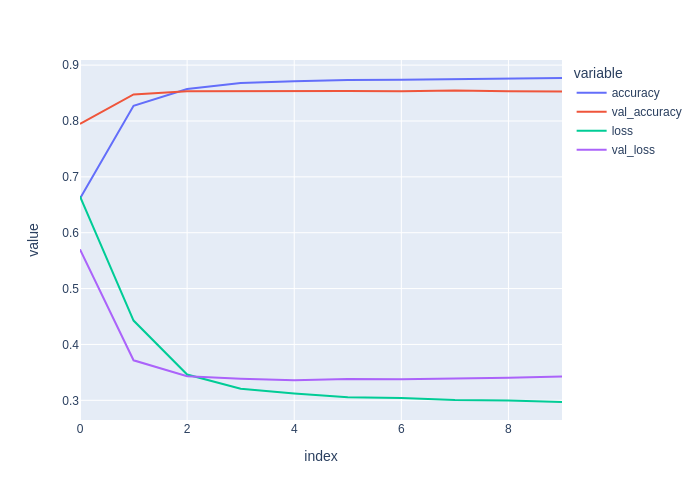

In [ ]:
Image(fig.to_image())

In [ ]:
pred = model.predict(test_ds["squeezed"])

In [ ]:
check_df = pd.DataFrame(test_ds)

In [ ]:
check_df["preds"] = pred

In [ ]:
check_df.preds[check_df.preds > 0.5] = 1
check_df.preds[check_df.preds < 0.5] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
check_df["label"] = check_df.label.progress_apply(lambda x: x.numpy())
check_df.squeezed = check_df.squeezed.progress_apply(lambda x: x.numpy())
check_df['listed'] = check_df.squeezed.progress_apply(lambda x: x.tolist())
check_df["decoded"] = check_df['listed'].progress_apply(lambda x:s.decode_ids(x) )
check_df['remove_padding'] =  check_df.listed.progress_apply(lambda x: np.array(x))
check_df['remove_padding'] =  check_df.remove_padding.progress_apply(lambda x: x[x>0])
check_df["pred_result"] = check_df.remove_padding.progress_apply(lambda x: s.decode_ids(x.tolist()))


100%|██████████| 16327/16327 [00:26<00:00, 606.34it/s]


In [ ]:
check_df[['pred_result','label','preds']]

,pred_result,label,preds
0,고대세안,1,0.0
1,난 결혼은 했지만감우성의 마음을 이해할수있을거 같아요,1,1.0
2,아줌마 킬러라는 특이점빼고는 구색맞추기 폭력뿐이다..,0,0.0
3,이런거 좋아함 ᄏᄏ 재밋게 밧음 ᄏᄏᄏ,1,1.0
4,몇 개의 A급이 포함된 자재를 가지고잡탕 음식을 만들어 팔고 있는 느낌.,0,0.0
...,...,...,...
16322,스토리는 아동용이지만 퀄리티 쩐다!,1,1.0
16323,티비 돌리다가 우현히 보게되었는데 진짜 보길 잘했네.....추천요,1,1.0
16324,김지호가 이영화 이후로 급격히 기울어 졌다,0,0.0
16325,"완점 잼 있음~ SF 제대로, 스릴러 제대로, 액션, 영상, 흥미 제대로...",1,1.0


In [ ]:
mecab_tensor, mecab_tokenizer = tokenize(senti_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 275068


In [ ]:
mecab_df = filtered_df[["document","label"]].copy()

In [ ]:
mecab_df["tokenized"] =  mecab_df.document.progress_apply(lambda x: mecab.morphs(x))

100%|██████████| 163266/163266 [00:13<00:00, 12235.70it/s]


In [ ]:
mecab_df.tokenized

0                     [어릴, 때, 보, 고, 지금, 다시, 봐도, 재밌, 어요, ㅋㅋ]
2         [폴리스, 스토리, 시리즈, 는, 1, 부터, 뉴, 까지, 버릴, 께, 하나, 도,...
4            [안개, 자욱, 한, 밤하늘, 에, 떠, 있, 는, 초승달, 같, 은, 영화, .]
5         [사랑, 을, 해, 본, 사람, 이, 라면, 처음, 부터, 끝, 까지, 웃, 을, ...
6                                 [완전, 감동, 입니다, 다시, 봐도, 감동]
                                ...                        
199995                              [포켓, 몬스터, 짜, 가, ㅡㅡ, ;;]
199996                                      [쓰, ., 레, ., 기]
199997    [완전, 사이코, 영화, ., 마지막, 은, 더욱더, 이, 영화, 의, 질, 을, ...
199998    [왜, 난, 재미없, 었, 지, ㅠㅠ, 라따뚜이, 보, 고, 나, 서, 스머프, 봐...
199999                      [포, 풍, 저그, 가, 나가, 신다, 영차영차, 영차]
Name: tokenized, Length: 163266, dtype: object

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters="")
tokenizer.fit_on_texts(mecab_df.tokenized.to_list())
tensor = tokenizer.texts_to_sequences(mecab_df.tokenized.to_list())
tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="pre",maxlen=50)

In [ ]:
mecab_df["padded"] = tensor.tolist()

In [ ]:
tokens = mecab_df.padded.to_list()
labels = mecab_df.label.to_list()

In [ ]:
ds = tf.data.Dataset.from_tensor_slices((tokens,labels))

In [ ]:
ds_size = len(tokens)
train_size = int(0.8 * ds_size)
valid_size = int(0.1 * ds_size)

In [ ]:
train_ds = ds.take(train_size)
valid_ds = ds.skip(train_size).take(valid_size)
test_ds = ds.skip(train_size).skip(valid_size)

In [ ]:
train_ds = batch_dataset(train_ds)
valid_ds = batch_dataset(valid_ds)
#test_ds = batch_dataset(test_ds)
dis_tr_ds = strategy.experimental_distribute_dataset(train_ds)
dis_val_ds = strategy.experimental_distribute_dataset(valid_ds)

In [ ]:
tf.tpu.experimental.initialize_tpu_system(tpu)
with strategy.scope():
    model = build_model(8000,16)

history = model.fit(
    dis_tr_ds,
    validation_data=dis_val_ds,
    steps_per_epoch = int(filtered_df.shape[0]/BATCH_SIZE),
    validation_steps = int(filtered_df.shape[0]/BATCH_SIZE),
    callbacks = [tf.keras.callbacks.LearningRateScheduler(lrfn,verbose=True),es],
    epochs=EPOCH,
)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.111.165.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.111.165.2:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.



Epoch 1: LearningRateScheduler setting learning rate to 0.0002.
Epoch 1/10
159/159 [==============================] - 8s 27ms/step - loss: 0.6944 - accuracy: 0.6961 - val_loss: 0.7880 - val_accuracy: 0.0000e+00 - lr: 2.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0002.
Epoch 2/10
159/159 [==============================] - 4s 22ms/step - loss: 0.6563 - accuracy: 0.7009 - val_loss: 0.8932 - val_accuracy: 0.0000e+00 - lr: 2.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0002.
Epoch 3/10
159/159 [==============================] - 4s 23ms/step - loss: 0.6732 - accuracy: 0.6107 - val_loss: 0.9789 - val_accuracy: 0.0000e+00 - lr: 2.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0002.
Epoch 4/10
159/159 [==============================] - 4s 22ms/step - loss: 0.6867 - accuracy: 0.5095 - val_loss: 0.7449 - val_accuracy: 0.3200 - lr: 2.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0002.
Epoch 5/10
159/159 [===

In [ ]:
test_ds = batch_dataset(test_ds)

In [ ]:
results = model.evaluate(test_ds,steps=int(512))

512/512 [==============================] - 6s 10ms/step - loss: 0.7191 - accuracy: 0.6829


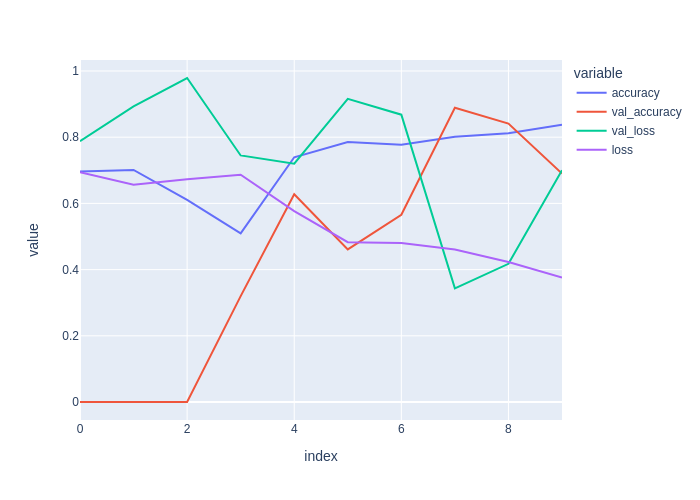

In [ ]:
fig = px.line(history.history,y=["accuracy","val_accuracy","val_loss","loss"])
Image(fig.to_image())

# 실험종료  
첫번째 실험으로 sentencepiece를 활용한 실험을 했고  
두번째 실험으로 mecab을 활용한 실험을 했으며  
세번째는 실험이 아닌 지난 시간에 분류를 했던 task를 확인하였다  
우선 데이터 전처리 과정에서 샘플링으로 확인한 결과, 1보다 작은 값은 배제하고, 균등한 분포를 만들어 주기 위해 적당하게 긴 내용은 자르게 되었다 텍스트 자체가 대부분 작다보니, 불용어나 특수문자를 제거하기 보다는 그대로 사용하기로 판단하였다  
그리고 문법적인 내용이 맞는 것도 있었지만 글들이 대부분 인터넷 용어나 이모티콘등이 있다보니 이러한 특징을 잘 잡아내는 형태소 분석기가 필요한 듯 했다  
이런점에서 mecab이 오히려 성능을 내지 못한 것으로 보이며, 마지막에 훈련 또한 제대로 이뤄지지 않는 모습을 보인다  
이에 반해서 먼저 실험한 sentencepiece의 경우 훈련도 잘되었고 적당하게 수렴하였으며, 결과 또한 만족스러운 모습을 보여주었다  
이는 지난번 감성분류 성적에 비해서 조금 더 높게 수렴되는 모습을 보여주면서 아무래도 효과적인 부분이 큰 것을 깨달았다  
모델만 조금 더 신경 썼더라면 90% 육박한 정확도가 나올 수도 있었을 듯 하다